<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# if needed (for efficiency purposes), open this file in colab and access the free GPU
# otherwsie, the code will run on the CPU
# set up local mac GPU offered by pytorch

In [ ]:
# Create a Model Class that inherits nn.Module
# nn.Module stands for neural network module
# this class will have 3 layers
# 1. input layer
# 2. hidden layer
# 3. output layer
# each layer will have a number of neurons
# the input layer will have 4 neurons
# the hidden layer will have 8 neurons
# the output layer will have 3 neurons
# the forward method will be used to pass the input data through the model
# the forward method will use the ReLU activation function
# the forward method will return the output of the model

# the model will be used to classify the iris flowers into 3 classes
# the model will be trained using the iris dataset
# the model will be evaluated using the test dataset
# the model will be saved and loaded for future use

class Model(nn.Module):
  # Input layer (4 features of the flower) --> 
  # Hidden Layer 1 (number of neurons) --> 
  # H2 (n) --> 
  # output (3 classes)
  def __inint__(self, in_features=4, h1=8. h2=9, out_features=3):
    # the values chosen for hidden layer is kind of arbitrary
    # input and output are determined
    super().__init__()
    # this stands for the parent
    # inintialize the layers
    self.fc1 = nn.Linear(in_features, h1)
    # fc stands for fully connected
    # input feature connected to the first hidden layer
    self.fc2 = nn.Linear(h1, h2)
    # the second hidden layer connected to the first hidden layer
    self.out = nn.Linear(h2, out_features)
    # lastly, the second hidden layer connected to the output layer

# we now need a function that will pass the input data through the model
# in other words, just moving things forward through the model
# the forward method will use the ReLU activation function
  def forward(self, x):
    x = F.relu(self.fc1(x)) # push it into first layer
    x = F.relu(self.fc2(x)) # into second layer
    x = self.out(x) # into output layer
    return x # return the output
  # you see that x just keeps on moving forward


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# This is the iris dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
# we can directly read the data from the url using pandas

In [ ]:
my_df.tail()
# see that we have four features 

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
# Change last column from strings to integers
# use replace function from pandas
# CNN, ML in general works better with numbers right?
# Setosa --> 0.0
# Versicolor --> 1.0    
# Virginica --> 2.0
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']
# X is the input data/the features (4 features, sepa length/width, petal length/width)
# y is the target data
# we are dropping the variety column from X, because that is basically the outcome that we are predicting

In [ ]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# we split both the input and target data into training and testing data
# the test size is 20% of the data, this is usually the standard
# we set a random seed for reproduc

In [14]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# make sure we are always feeding the model with tensors
# we are converting the data to tensors, because pytorch works with tensors

In [ ]:
# Convert y labels to tensors long
# do the same thing, both input and output train and test must be tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# this is the loss function, the error function
# we want to make sure we visualize the error, so we can see how well the model is doing
# we want to minimize the error
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# so the lower the learning rate, the more accurate the model will be, but the slower it will be
# the higher the learning rate, the faster the model will be, but the less accurate
# so remember to find the sweet spot

### Training the model!

In [19]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100 # what is the best number of epochs?
losses = [] # keep track of the loss
# we want to see how the loss changes over time
# Looking at the plateau
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first 
    loss = criterion(y_pred, y_train) # Predicted values vs the y_train

    # Keep track of the loss
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i%10 == 0:
        print(f'Epoch {i} and loss is: {loss}')

    # Do the backpropagation: take the error rate of forward propagration and feed it back 
    # thru the network to adjust the weights
    optimizer.zero_grad() # zero the gradient
    loss.backward() # backpropagation
    optimizer.step() # update the weights

Epoch 0 and loss is: 1.125203251838684
Epoch 10 and loss is: 1.0097211599349976
Epoch 20 and loss is: 0.8162347674369812
Epoch 30 and loss is: 0.5859931111335754
Epoch 40 and loss is: 0.4003389775753021
Epoch 50 and loss is: 0.26794713735580444
Epoch 60 and loss is: 0.1796349436044693
Epoch 70 and loss is: 0.12165623158216476
Epoch 80 and loss is: 0.08606517314910889
Epoch 90 and loss is: 0.06522618234157562


Text(0.5, 0, 'Epoch')

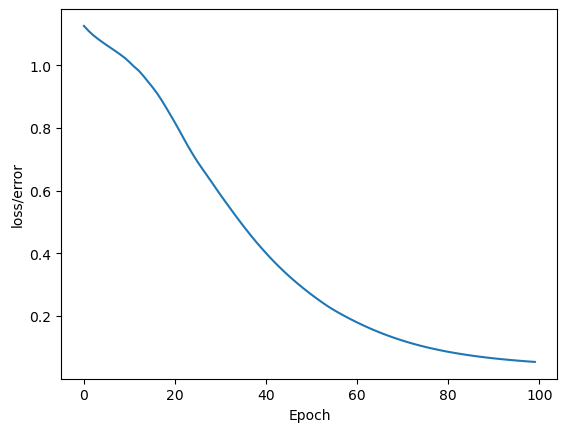

In [20]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [21]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [ ]:
# This is the final loss for the test data set, which shows how good our model is
# it represent the model's fit on the test data, lower the loss the better it is
loss
# notice that this value is quite far from the loss we got from the training data
# it's way higher than the training loss, but that's okay
# because this is the first time the model is seeing this data
# as long as the accuracy expected is reached, for example, in this case it has predicted 28 our 30 correctly
# let's dive deeper to see how our model did on this data

tensor(0.1315)

In [23]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.)  tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.)  tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.)  tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.)  tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.)  tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.)  ten

In [29]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
# new flower data

In [30]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [32]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
# more new flower

In [34]:
with torch.no_grad():
  print(model(newer_iris))
# the model is predicting the new flowers correctly

tensor([-5.9960,  4.5080,  6.6831])


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')


In [35]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [36]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

### My summar of creating a simple neural network

1. Define model where there is: input, hidden layers (fully connected), and output layer with a forward method that pushes the input through the layers.
2. Load and format data into appropriate form so mostly using pandas. 
3. Define the input and output
4. Define input traning and test, output training and test
5. Set the loss function criterion and the learning rate
6. Train the model, for the number of epochs, while tracking the loss.
7. Adjust epochs and learning rate accordingly and apply to test data and see the loss result.
8. Trouble shoot/ further dive in by looking at the correctness of the prediction on the test data if necessary (for example, if the loss value is far higher compared to the training).
9. Try testing on some new data.
10. Save the model.
11. Load the model. 